### Шаг 1. Импорт библиотек и данных

Начинаем с импорта pandas

In [1]:
import pandas as pd
import seaborn as sns

Главные действующие лица задания - квартиры, присваиваем таблице название real_estate.

Откроем таблицу и прочитаем пять первых строк

In [2]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Данные разбиты по столбцам.  
Бросаются в глаза "некрасивые" названия cityCenters_nearest ,  	parks_around3000 и ponds_around3000, заменим на в следующем шаге - Предобработка данных

---

Методом info() посмотрим всю информацию о таблице и о данных в столбцах.

In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итого - 22 столбца, 23699 строк, данные типов: bool, float, int, object.  
Много пропусков значений в столбцах ceiling_height, is_apartment (!!!), balcony, parks_nearest, ponds_nearest.  
  
Варианты обработки:  
* балконы, как в описании к заданию - заполнить значением 0; 
* апартаменты - nan, возможно, заполнить False, проверить рынок апартов на текущий момент;  
* высота потолка - посмотреть значения по describe(), сгруппировать похожие предложения и, как в первом проекте, заполнить пропуски "подобными" значениями;  
* парков в родном Питере всего 68, увы не на всех жителей их хватает. Оставим значения nan;  
* расстояния до ближайших водоемов так же предварительно оставим nan, к тому же этот массив данных получен автоматически, значит, система сбора данных не нашла подходящих значений;
* nan в days_exposition - заменим на разницу между сегодняшей (06.02.2020) датой и датой публикации.



В значения int нужно будет перевести следующие столбцы:  

last_price - ниразу не встречались обьявления о продаже квартир с копейками.  
floors_total, этаж - это целое число  
balcony - балкон всегда "целый"
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - значения в метрахб сантиметры не в счет  
days_exposition - дни в "целом виде" будет считать удобнее

---

Пропущенные значение:
* Балконы - отсутсвие балкона - жильцы оставляли пропуск.
* Высота потолков - возможно, случайный пропуск, а, возможно, жильцы просто не знают реальное расстояние между полом и потолком в данном объекте.
* Самые интересные пропуски - в аппартаментах. Скорее всего вызваны тем, что рынок апарт-жилья начал усиленно развиваться всего 1-2 последних года. Вероятно, таких предложений на рынке вторички (мы же рассматриваем продажу жилья уже частными лицами) действительно мало.
* Пропуски в столбце days_exposition - получается, квартира еще находится в продаже.
* Все столбцы с расстояниями - пропуски не случайны, так как собирались автоматизированной системой. Пропуски расстояния до центра возникли из-з того, что многие населенные пункты слишком далеко от Санкт-Петербурга и нет смысла считать данный километраж.

---

Вызовем метод describe() и взглянем на значения столбцов.

In [4]:
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


* Наличие изображений - артефакты при первом знакомстве не встречаются.  
* Комнаты - значения 0 (у кого-то в квартире только коридор и ванная(?) и 19 (хотя надо проверить, возможно такая недвижимость встречается в продаже).  
* Общая площадь в 12 кв. метров - грустная квартира. Исследуем остальные значения.
* Минимальное значение цены в 12190 - неправдопадобно мало
* Высота потолка в 1 и 100 метров - квартиры для лиллипутов и гулливеров, только сегодня!  
* Бывает ли в доме только один этаж - да, 60 - ложь. Лахта центр еще не ввели в эксплуатацию, а самое высокое здание пока у нас в 42 этажа. 
* Жилая площадь в 2 квадратных метра - недобор, заменим, медиана в 30 квадратов, в среднем, похожа на правду.   
* Минимальная площадь кухни в 1,3 квадрата - повезло кому-то (обработаем, заменим), средняя площадь в 9 квадратов похожа на правду.  
* Балконы - крайние значения 0 и 5 - немного странно, но, возможно. В среднем - 1 балкон - похоже на правду.  
* А, действительно, кто-то живет прямо в аэропорту? Неужели, это персонаж Тома Хенкса? Значение в 0 км до аэропорта надо будет исправить и посмотреть общее количество таких значений.  
* С парками и водоемами все, на первый взгляд, нормально. 



Проверим, много ли уникальных значений в единственном столбце со словами - locality_name

In [5]:
real_estate['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Повторяющиеяс по разному названия - посЕлок Мурино и посЁлок Мурино, и тд. Необходимо будет привести данные к одному виду - оставить только название населенного пункта.

In [6]:
real_estate[real_estate.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В завершении первого шага проверяем наличие полных дубликатов.  
Которые пока не обнаружены.

---

Выведем таблицу, с количеством пропусков во всем перичном датасете

In [7]:
real_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как уже описывалось выше, больше всего пропусков в столбце с указанием причастности к аппартаментам.  
Высота потолков и наличие балкона так же требуют скорейшей коррекции.

---

Шаг 1 выполнен, переходим к выводам.

### Вывод

На первом шаге был проведен анализ исходной таблицы.  
Итого - 22 столбца, 23699 строк, данные типов: bool, float, int, object.  
Обнаружено большое количество пропусков, артефактных и некорректных данных, например, как высота потолка в 1 метр или 60 этажей в доме.  
Переходим ко второму шагу и избавляемся от мусора.

---

### Шаг 2. Предобработка данных

#### Переименование столбцов

Изменим названия cityCenters_nearest, parks_around3000, ponds_around3000  
на, соответственно:  
city_сenter_nearest, parks_around_3000, ponds_around_3000 

In [8]:
real_estate.rename(columns={'cityCenters_nearest': 'city_center_nearest', 
                            'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}, 
                   inplace=True)

In [9]:
real_estate.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


---

#### Цена

Изменим очень малое значение цены квартиры на приемлемое


In [10]:
real_estate['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

In [11]:
real_estate.loc[8792]

total_images                              1
last_price                            7e+06
total_area                               80
first_day_exposition    2019-01-24T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                             25
living_area                              49
floor                                     6
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                             13
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                      37006
city_center_nearest                   15157
parks_around_3000                         0
parks_nearest                           NaN
ponds_around_3000                         0
ponds_nearest                           NaN
days_exposition                          29
Name: 8792, dtype: object

Судя по всему, такая квартира будет стоить 12 млн, вместо 12 тысяч рубляй. (за 12к я бы сам, конечно, взял)

In [12]:
real_estate.loc[8792, 'last_price'] = 12190000
real_estate.loc[8792][1]

12190000.0

Цена приведена в норму, двигаемся дальше

---

#### Количество этажей

Проверим общую этажность в домах и имеются ли пропущенные значения

In [13]:
real_estate['floors_total'].isna().sum()

86

Всего 85 пропущенных значений из почти 24 тысяч. 

In [14]:
real_estate.query('floors_total.isna() and floor > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
2392,7,5395770.0,53.0,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.8,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21753,7,6800000.0,57.0,2017-05-01T00:00:00,2,NaN,NaN,NaN,21,NaN,False,False,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Большая часть пропущеных значений в домах выше 5 и даже 15 этажей. Есть значения более 22 этажей - заменим все пропущенные значения на 25-этажные дома (новостройки), к тому же во всем исследовании их более 1 тысячи.

In [15]:
real_estate['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [16]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(value=25)
real_estate['floors_total'].isna().sum()

0

---

#### Обработка времени и даты

Переведем значения даты в требуемый формат

In [17]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_center_nearest     18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

In [18]:
real_estate.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


#### Стандартизация названий населенных пунктов

Создадим список "ненужных слов", и с помощью функции удалим его из столбца с названием населенных пунктов.  
"Очищенные" названия сохраним в столбце "loc_name_filt"

In [19]:
real_estate['locality_name'] = real_estate['locality_name'].astype('str')
types = ({'садоводческое','некоммерческое','город','поселок', 'посёлок',
          'товарищество','городского', 'типа','садовое','городской','коттеджный','станции','село',
          'деревня','при','железнодорожной'}
)

def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]

real_estate['loc_name_filt'] = real_estate['locality_name'].apply(name)

real_estate.head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Проверяем уникальные значения названий населенных пунктов в новом столбце.

In [20]:
real_estate['loc_name_filt'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', "Красный', 'Бор", 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', "Новое', 'Девяткино",
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', "Новая', 'Ропша", 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', "Село', 'Красное", 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', "Новый', 'Свет", 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', "Бор', 'Сосновый", 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин',
       'Победа', 'Нурма', 'Синявино', 'Тосно', 'Стрельна

Обнаружены значения 'nan', посмотрим, сколько их всего 

In [21]:
len(real_estate.loc[real_estate['loc_name_filt']=='nan'])

49

Обнаружено 49 значений 'nan' в столбце с названиями населенных пунктов, посмотрим, указаны ли расстояния до центра в данных строках. По этим показателям можно будет присвоить имена пропущенным городам

In [22]:
real_estate.loc[real_estate['loc_name_filt']=='nan', 'city_center_nearest']

1097      4258.0
2033         NaN
2603     17369.0
2632     17369.0
3574      8127.0
4151      3902.0
4189      3039.0
4670      5382.0
5343      9538.0
5707     16788.0
6765     17369.0
7114      8582.0
7330      4627.0
7600     12332.0
8568      4065.0
8986     31813.0
9821      3801.0
10122     4474.0
11248     4069.0
12879    12332.0
12936     4383.0
13223    17369.0
13690    23659.0
14273    17369.0
14342        NaN
15686     9633.0
15866     9497.0
16499    17369.0
16561     8619.0
16610     1322.0
17535        NaN
17764    10976.0
18526     8943.0
18917     8429.0
19045     3312.0
19972    17369.0
20057     4258.0
20382        NaN
20590        NaN
20654     4604.0
21119    31897.0
21276    41294.0
21333     4805.0
21715        NaN
21898        NaN
22474     1780.0
22717        NaN
22933    17369.0
23214     8943.0
Name: city_center_nearest, dtype: float64

Необходимо понять, где заканчиваются табличные значения границы города Санкт-Петербурга.  
Опытным путем было установлено, что значение в 29400 м до цетра города - это и есть граница Питера.  

In [23]:
sp_borders_1 = real_estate.loc[real_estate['city_center_nearest']<=29400]
sp_borders_2 = real_estate.loc[29500< real_estate['city_center_nearest'] ]
sp_borders_1['locality_name'].unique(), sp_borders_2['locality_name'].unique()

(array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
        'посёлок Металлострой', 'Пушкин', 'Красное Село',
        'посёлок Стрельна', 'посёлок Александровская', 'nan',
        'посёлок Песочный', 'посёлок Петро-Славянка', 'поселок Лисий Нос',
        'посёлок Левашово', 'поселок Мурино', 'посёлок Лисий Нос',
        'посёлок Усть-Ижора'], dtype=object),
 array(['Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
        'Павловск', 'Сестрорецк', 'посёлок Шушары', 'Красное Село',
        'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
        'посёлок Репино', 'посёлок Сапёрный', 'посёлок Щеглово',
        'посёлок Белоостров', 'nan'], dtype=object))

Соответственно, значения 'nan' в столбце loc_name_filt с показателем расстояния до центра 29400 м - заменить на "Санкт-Петербург"

In [24]:
real_estate.loc[real_estate['city_center_nearest'] <= 29400, 'loc_name_filt'] = 'Санкт-Петербург'
len(real_estate.loc[real_estate['loc_name_filt']=='nan'])

11

Осталось 11 значений 'nan'

In [25]:
real_estate.loc[real_estate['loc_name_filt']=='nan']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,34.0,nan
8986,10,4850000.0,103.1,2018-07-10,3,NaN,25.0,68.1,4,NaN,False,False,16.7,NaN,nan,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,nan
14342,3,3611000.0,53.5,2017-04-27,1,NaN,4.0,25.8,3,False,False,False,NaN,1.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,92.0,nan
17535,2,5985000.0,79.8,2018-07-30,3,NaN,9.0,NaN,2,False,False,False,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,213.0,nan
20382,8,1750000.0,72.9,2018-10-27,3,NaN,5.0,47.3,2,NaN,False,False,8.3,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
20590,7,3380000.0,56.0,2017-11-06,2,2.7,4.0,29.0,3,NaN,False,False,10.0,1.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,78.0,nan
21119,8,3500000.0,43.2,2018-11-11,2,NaN,4.0,NaN,2,NaN,False,False,NaN,NaN,nan,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0,nan
21276,0,17122148.0,178.3,2017-02-10,1,NaN,3.0,NaN,1,NaN,False,False,41.6,1.0,nan,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,nan
21715,2,6047550.0,80.1,2018-07-30,2,NaN,9.0,30.5,2,False,False,False,29.2,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,176.0,nan
21898,2,5886750.0,83.5,2018-07-30,2,NaN,9.0,36.6,2,False,False,False,29.7,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,169.0,nan


Разберемся с тремя поддающимися анализу неизвестными значениями.

In [26]:
real_estate.query('61000>airports_nearest>59000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
146,11,4400000.0,53.6,2018-03-31,2,2.55,10.0,29.2,10,NaN,False,False,7.8,1.0,Сестрорецк,60883.0,36102.0,1.0,341.0,2.0,256.0,55.0,Сестрорецк
2654,4,3936700.0,42.8,2018-01-02,1,2.75,14.0,10.0,4,NaN,False,False,15.9,2.0,Сестрорецк,59377.0,36307.0,1.0,88.0,2.0,140.0,16.0,Сестрорецк
14559,5,7602000.0,84.0,2018-01-01,3,2.75,12.0,46.6,6,NaN,False,False,18.9,5.0,Сестрорецк,59377.0,36307.0,1.0,88.0,2.0,140.0,112.0,Сестрорецк
21276,0,17122148.0,178.3,2017-02-10,1,NaN,3.0,NaN,1,NaN,False,False,41.6,1.0,nan,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,nan
22160,9,5450000.0,52.4,2018-01-20,2,2.55,10.0,28.9,8,NaN,False,False,7.5,NaN,Сестрорецк,60883.0,36102.0,1.0,341.0,2.0,256.0,241.0,Сестрорецк
22257,5,5490000.0,61.0,2017-11-14,3,NaN,5.0,41.0,4,NaN,False,False,7.5,NaN,Сестрорецк,59705.0,36635.0,1.0,298.0,2.0,325.0,200.0,Сестрорецк


Нижнее похоже на Сестрорецк. Немсотря на разницу средних показателей расстояния до центра СПб, локация по цене и расположению похожа на Сестрорецк - город вытянут примерно на 7 км вдоль Финского залива и имеет в своем распоряжении недвижимость за 17+ млн руб

In [27]:
real_estate.loc[21276, 'loc_name_filt'] = 'Сестрорецк'

А вот оставшиеся два неизвестных города с указанными расстояниями не подходят под имеющиеся данные, ни по Колпино, ни под Петергоф.
Слишком отличается расстояние до аэропорта.  


In [28]:
real_estate.query('31900>city_center_nearest>31800')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
2396,5,5650000.0,50.0,2016-05-13,1,NaN,8.0,21.0,8,False,False,False,17.0,1.0,Колпино,26100.0,31886.0,2.0,332.0,2.0,472.0,89.0,Колпино
4315,4,3500000.0,43.0,2017-10-10,2,NaN,5.0,28.0,1,NaN,False,False,6.0,NaN,Петергоф,36622.0,31811.0,2.0,697.0,3.0,641.0,NaN,Петергоф
4721,6,2700000.0,31.0,2017-11-10,1,NaN,4.0,18.0,3,NaN,False,False,6.0,1.0,Колпино,26062.0,31848.0,2.0,141.0,3.0,55.0,22.0,Колпино
8252,15,12750000.0,102.0,2018-10-17,3,2.80,7.0,61.0,4,True,False,False,12.0,5.0,Колпино,26100.0,31886.0,2.0,332.0,2.0,472.0,172.0,Колпино
8986,10,4850000.0,103.1,2018-07-10,3,NaN,25.0,68.1,4,NaN,False,False,16.7,NaN,nan,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,nan
9119,7,2750000.0,43.0,2017-11-10,2,NaN,5.0,29.0,5,NaN,False,False,5.5,NaN,Колпино,26027.0,31814.0,3.0,395.0,3.0,175.0,74.0,Колпино
9849,14,3300000.0,43.4,2015-03-17,2,2.50,4.0,31.2,1,NaN,False,False,5.6,0.0,Петергоф,36622.0,31811.0,2.0,697.0,3.0,641.0,547.0,Петергоф
10485,15,4900000.0,60.0,2016-12-05,2,2.50,9.0,26.0,3,NaN,False,False,17.0,NaN,Колпино,26068.0,31855.0,0.0,NaN,0.0,NaN,528.0,Колпино
12346,11,2550000.0,30.0,2016-05-30,1,2.50,9.0,15.0,5,False,False,False,6.0,0.0,Колпино,26068.0,31855.0,0.0,NaN,0.0,NaN,451.0,Колпино
14463,7,3100000.0,45.0,2018-01-12,2,2.40,5.0,29.0,5,NaN,False,False,6.0,NaN,Колпино,26074.0,31861.0,2.0,231.0,2.0,371.0,11.0,Колпино


Как итог, предлагаю оставшиеся 10 строк со значениями 'nan' в loc_name_filt просто удалить из таблицы. Они не повлияют на статистику из 23+ тыс обьектов

In [29]:
real_estate.loc[real_estate['loc_name_filt']=='nan', 'loc_name_filt'] = 0

In [30]:
real_estate = real_estate[real_estate['loc_name_filt']!=0].reset_index(drop=True)

real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 23 columns):
total_images            23689 non-null int64
last_price              23689 non-null float64
total_area              23689 non-null float64
first_day_exposition    23689 non-null datetime64[ns]
rooms                   23689 non-null int64
ceiling_height          14502 non-null float64
floors_total            23689 non-null float64
living_area             21788 non-null float64
floor                   23689 non-null int64
is_apartment            2770 non-null object
studio                  23689 non-null bool
open_plan               23689 non-null bool
kitchen_area            21414 non-null float64
balcony                 12176 non-null float64
locality_name           23689 non-null object
airports_nearest        18155 non-null float64
city_center_nearest     18178 non-null float64
parks_around_3000       18179 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Названия городов приведены к одному виду, пропуски в городах удалены.

---

#### Изменение типа данных

Переведем в int значения столбца last_price.  
Остальные столбцы пока имеют пропущенные значения, перевод сделаем позже

In [31]:
real_estate['last_price'] = real_estate['last_price'].astype('int')

In [32]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 23 columns):
total_images            23689 non-null int64
last_price              23689 non-null int64
total_area              23689 non-null float64
first_day_exposition    23689 non-null datetime64[ns]
rooms                   23689 non-null int64
ceiling_height          14502 non-null float64
floors_total            23689 non-null float64
living_area             21788 non-null float64
floor                   23689 non-null int64
is_apartment            2770 non-null object
studio                  23689 non-null bool
open_plan               23689 non-null bool
kitchen_area            21414 non-null float64
balcony                 12176 non-null float64
locality_name           23689 non-null object
airports_nearest        18155 non-null float64
city_center_nearest     18178 non-null float64
parks_around_3000       18179 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

#### Замена пропусков и удаление мусора

##### Начнем с балконов

Вначале посмотрим на все встречаюшиеся значения балконов, их количество.

In [33]:
real_estate['balcony'].value_counts()

1.0    4192
0.0    3757
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Узнаем, сколько Nan присутствуют в столбце балконов

In [34]:
real_estate['balcony'].isna().sum()

11513

Заменим nan на нулевые значения.
И сразу переведем float в int.

In [35]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)
real_estate['balcony'] = real_estate['balcony'].astype('int')
real_estate['balcony'].value_counts()

0    15270
1     4192
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

11513 значений Nan, ставших нулями + 3757 первоначальных нулевых значений = 15270, заполнение Nan выполнено верно.

---

##### Площадь квартиры

Посмотрим уникальный значения и выявим выбивающиеся из общей массы, начнем с очень мелких значений.

In [36]:
real_estate['total_area'].sort_values()

19900     12.0
17957     13.0
19542     13.0
19803     13.0
19554     13.2
         ...  
5357     590.0
15648    618.0
3116     631.0
12857    631.2
19536    900.0
Name: total_area, Length: 23689, dtype: float64

In [37]:
real_estate.loc[19900]

total_images                              4
last_price                          2400000
total_area                               12
first_day_exposition    2017-07-19 00:00:00
rooms                                     1
ceiling_height                         2.55
floors_total                              5
living_area                              10
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                      21314
city_center_nearest                     964
parks_around_3000                         1
parks_nearest                           886
ponds_around_3000                         2
ponds_nearest                            45
days_exposition                         200
loc_name_filt               Санк

12 кв метров - не баг, а обьявления о продаже комнат.

Квартиры с площадью 600+ м2 так же имеются (в принципе и в продаже)  
https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/?areaMin=600

Двигаемся дальше.

---

##### Высота потолка

Смотрим значения и ищем выбивающиеся

In [38]:
real_estate['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Примем верхнюю допустимую границу потолка, как 5 метров. Подобные обьявления действительно встречаются в продаже.  
https://realty.yandex.ru/offer/8310251191878644238/  

Значения меньше 2,5 м - необходимо будет удалить, поскольку высота потолков по СНИПу должна быть не менее данного значения  

Но сначала уберем двузначные значения, которые возникли, скорее всего, вследствие неправильного ввода данных - 25. вместо 2.5 м.

In [39]:
real_estate.loc[real_estate['ceiling_height'] > 9, 'ceiling_height'] = real_estate.loc[real_estate['ceiling_height'] > 9, 'ceiling_height'] / 10

Посчитаем количество объектов с потолками, не вписывающимся в стандарты:

In [40]:
len(real_estate.loc[real_estate['ceiling_height'] < 2.5, 'ceiling_height'])

78

Всего 78 обьектов с высотой потолков менее 2,5 м. Можно спокойно заменить их на стандартные значения без потери качества исследования

In [41]:
real_estate.loc[real_estate['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5
len(real_estate.loc[real_estate['ceiling_height'] < 2.5, 'ceiling_height'])

0

Проверим количество очень высоких потолков

In [42]:
len(real_estate.loc[real_estate['ceiling_height'] > 5, 'ceiling_height'])

12

Спокойно заменяем 12 значений на цифру 5 и продолжаем исследование

In [43]:
real_estate.loc[real_estate['ceiling_height'] > 5, 'ceiling_height'] = 5
real_estate['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.  , 2.87, 2.66, 2.59,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 ,
       3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31,
       4.65, 3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25,
       3.29, 3.76, 3.69, 2.89, 3.58, 4.9 , 3.48, 3.

Посчитаем количество Nan в столбце с высотой потолков.

In [44]:
len(real_estate.query('ceiling_height.isna()'))

9187

9187 пропущенных значений высоты потолка.

In [45]:
real_estate.loc[real_estate['loc_name_filt'] == 'Санкт-Петербург', 'ceiling_height'].isna().sum()


6145

В Санкт-Петербурге не заполнили знчение потолка в обьявлениях 6145 раз.

В данном случае предлагаю заполнить пропущенные значения медианой потолков по Санкт-Петерубургу.

In [46]:
sp_ceil_height = real_estate.loc[real_estate['loc_name_filt'] == 'Санкт-Петербург', 'ceiling_height'].median()
sp_ceil_height

2.7

In [47]:
real_estate.loc[real_estate['loc_name_filt'] == 'Санкт-Петербург', 'ceiling_height'] = (
real_estate.loc[real_estate['loc_name_filt'] == 'Санкт-Петербург', 'ceiling_height'].fillna(value=sp_ceil_height)
)

real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,2.70,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Санкт-Петербург
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


In [48]:
(real_estate.query('ceiling_height.isna()'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
11,9,3300000,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,Ломоносов
12,10,3890000,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
14,1,4400000,36.00,2016-06-23,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,Пушкин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23659,8,3000000,34.10,2017-11-10,1,NaN,9.0,17.00,3,NaN,False,False,9.00,1,Колпино,24687.0,30473.0,0.0,NaN,1.0,741.0,74.0,Колпино
23669,0,2500000,35.00,2017-12-08,1,NaN,9.0,NaN,4,NaN,False,False,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"Бор', 'Сосновый"
23682,2,1350000,30.00,2017-07-07,1,NaN,5.0,17.50,4,NaN,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Тихвин
23685,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.00,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно


Осталось 3042 незаполненных значения высоты потолка, чуть больше 10% от всех данных. Пока оставим без изменений, посмотрим, как будет влиять на построение графиков.

---

In [49]:
real_estate.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
11,9,3300000,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,Ломоносов
12,10,3890000,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
14,1,4400000,36.00,2016-06-23,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,Пушкин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23659,8,3000000,34.10,2017-11-10,1,NaN,9.0,17.00,3,NaN,False,False,9.00,1,Колпино,24687.0,30473.0,0.0,NaN,1.0,741.0,74.0,Колпино
23669,0,2500000,35.00,2017-12-08,1,NaN,9.0,NaN,4,NaN,False,False,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"Бор', 'Сосновый"
23682,2,1350000,30.00,2017-07-07,1,NaN,5.0,17.50,4,NaN,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Тихвин
23685,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.00,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно


Заполним пропущенные данные средним значением по городам.

In [50]:
real_estate['ceiling_height'] = (real_estate.groupby('loc_name_filt')['ceiling_height'].
                                 transform(lambda x: x.fillna(x.median()))
                                )

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [51]:
len(real_estate.query('ceiling_height.isna()'))

91

91 значение осталось незаполненым, потому что первичная информация о потолках в данных населенных пунктах не была представленна в исходной таблице. Удалять эти строки мы не будем, чтобы не выбрасывать эти города из исследования.

---

##### Жилая площадь

Посмотрим количество пропущенных значений жилой площади

In [52]:
len(real_estate.query('living_area.isna()'))

1901

In [53]:
real_estate['living_area'].sort_values()

21750    2.0
13913    2.0
3241     3.0
23564    3.0
17578    5.0
        ... 
23632    NaN
23653    NaN
23660    NaN
23669    NaN
23687    NaN
Name: living_area, Length: 23689, dtype: float64

In [54]:
real_estate.groupby('loc_name_filt')['living_area'].median()

loc_name_filt
Агалатово                        18.0
Алексеевка                       29.5
Аннино                           30.0
Аро                              31.5
Барышево                         30.3
                                 ... 
Ялгино                           30.0
Яльгелево                        28.9
Ям-Тесово                        17.3
Янино-1                          22.5
километр', '69-й', 'Платформа    29.8
Name: living_area, Length: 296, dtype: float64

1901 - менее 10 процентов от общих данных.  
Заполним медианным значением по городам.

Сверхмалые значения жилой площади пока изменять не будем.

In [55]:
real_estate['living_area'] = (real_estate.groupby('loc_name_filt')['living_area'].
                                 transform(lambda x: x.fillna(x.median()))
                                )

In [56]:
len(real_estate.query('living_area.isna()'))

15

Всего 15 незаполненных значений осталось в датасете, вероятно, по той же причине, что и с высотой потолков - из-за отсутсвия первичных данных в представленных населенных пунктах.  
Продолжаем исследование.

----

##### Количество комнат

Проверим значения в этом столбце

In [57]:
real_estate['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Не удивляемся значениям в 19 комнат - на рынке есть и бОльшие предложения  
https://realty.yandex.ru/offer/1196857400349778198/?isExact=YES

а вот с нулевыми значениями поработаем

In [58]:
real_estate.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
144,1,2450000,27.00,2017-03-30,0,2.70,24.0,15.50,2,NaN,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,Мурино
349,4,2320000,25.00,2017-09-27,0,2.75,14.0,17.00,1,NaN,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Кудрово
440,8,2480000,27.11,2018-03-12,0,2.70,17.0,24.75,4,NaN,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Санкт-Петербург
508,0,3375000,34.40,2017-03-28,0,2.70,26.0,24.30,19,NaN,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,Санкт-Петербург
608,2,1850000,25.00,2019-02-20,0,2.60,10.0,30.00,7,NaN,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,7,3200000,26.00,2017-09-01,0,2.70,25.0,18.00,16,NaN,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,Санкт-Петербург
23432,0,2500000,27.70,2017-09-28,0,2.70,24.0,18.00,4,NaN,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Мурино
23544,15,3350000,26.00,2018-09-07,0,2.70,19.0,31.00,8,NaN,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,Санкт-Петербург
23582,10,1450000,29.00,2017-11-11,0,2.56,9.0,18.00,8,NaN,False,True,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,Никольское


In [59]:
real_estate.query('studio == True and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
144,1,2450000,27.00,2017-03-30,0,2.70,24.0,15.50,2,NaN,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,Мурино
440,8,2480000,27.11,2018-03-12,0,2.70,17.0,24.75,4,NaN,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Санкт-Петербург
608,2,1850000,25.00,2019-02-20,0,2.60,10.0,30.00,7,NaN,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,Шушары
697,12,2500000,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,True,False,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,Кудрово
716,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22857,8,3090000,30.00,2017-12-17,0,2.70,25.0,18.20,5,NaN,True,False,NaN,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0,Санкт-Петербург
22867,2,4280000,28.00,2017-10-26,0,2.70,19.0,18.00,10,NaN,True,False,NaN,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0,Санкт-Петербург
23200,7,3200000,26.00,2017-09-01,0,2.70,25.0,18.00,16,NaN,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,Санкт-Петербург
23544,15,3350000,26.00,2018-09-07,0,2.70,19.0,31.00,8,NaN,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,Санкт-Петербург


Получается, что в строках с квартирами студиями - количество комнат = 0.
А это значит, что в столбце studio - некоторые пропущенные значения можно заполнить на True.

In [60]:
len(real_estate.query('studio == True'))

149

In [61]:
real_estate.loc[real_estate['rooms']==0, 'studio'] = True
len(real_estate.query('studio == True'))

208

В некоторых студиях были отмечены по 1 комнате, переведем данные значения в 0

In [62]:
real_estate.loc[real_estate['studio']==True, 'rooms'] = 0

In [63]:
real_estate.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt
144,1,2450000,27.00,2017-03-30,0,2.70,24.0,15.50,2,NaN,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,Мурино
349,4,2320000,25.00,2017-09-27,0,2.75,14.0,17.00,1,NaN,True,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Кудрово
440,8,2480000,27.11,2018-03-12,0,2.70,17.0,24.75,4,NaN,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Санкт-Петербург
508,0,3375000,34.40,2017-03-28,0,2.70,26.0,24.30,19,NaN,True,True,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,Санкт-Петербург
608,2,1850000,25.00,2019-02-20,0,2.60,10.0,30.00,7,NaN,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,7,3200000,26.00,2017-09-01,0,2.70,25.0,18.00,16,NaN,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,Санкт-Петербург
23432,0,2500000,27.70,2017-09-28,0,2.70,24.0,18.00,4,NaN,True,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Мурино
23544,15,3350000,26.00,2018-09-07,0,2.70,19.0,31.00,8,NaN,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,Санкт-Петербург
23582,10,1450000,29.00,2017-11-11,0,2.56,9.0,18.00,8,NaN,True,True,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,Никольское


Значения в столбце количества комнат - обработаны

---

##### Площадь кухни

Проверим отсутсвующие и крайние значения в данном столбце.

In [64]:
real_estate['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

Значения Nan в данном столбце - это значения в студиях.  
https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/studiya/?kitchenSpaceMin=5 Так же, как и в реальной ЯндексНедвижимости.

Минимальными значениями кухни примем 5 м2. Меньшая площадь запрещена по строительным и пожарным нормам.  
http://www.0-1.ru/law/showdoc.asp?dp=20801-89&chp=8

In [65]:
len(real_estate.query('kitchen_area < 5'))

105

In [66]:
real_estate.loc[real_estate['kitchen_area'] < 5, 'kitchen_area'] = 5
len(real_estate.query('kitchen_area < 5'))

0

Значения в столбце площадь кухни обработаны

---

##### Публикация - снятие

Проверим, сколько отсутствующих значений есть в столбце days_exposition

In [67]:
real_estate['days_exposition'].isna().sum()

3180

Более 12% от общей массы. Заполним их медианой по всем данным

In [68]:
days_exp_median = real_estate['days_exposition'].median()
days_exp_median
real_estate.loc[real_estate['days_exposition'].isna(),'days_exposition'] = days_exp_median
real_estate['days_exposition'].isna().sum()

0

---

### Вывод

На втором этапе была произведена предобработка данных:
* отсортированы и преведены в общий вид названия населенных пунктов
* заполнены пропуски балконов, высоты потолков, жилой и общей площади и количества комнат

Максимально от мусора были очищенны требуемые для анализа столбцы.  
Переходим к следующему шагу.

---

### Шаг 3. Посчитайте и добавьте в таблицу

На данном шаге необходимо добавить

    цену квадратного метра;
    день недели, месяц и год публикации объявления;
    этаж квартиры; варианты — первый, последний, другой;
    соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### Цена квадратного метра

Стоимость квартиры необходимо разделить на ее общую площадь.  
Новый столбец назовем sqr_m_price

In [69]:
real_estate['sqr_m_price'] = (real_estate['last_price'] / real_estate['total_area'])
real_estate['sqr_m_price'] = real_estate['sqr_m_price'].astype('int')
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt,sqr_m_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Санкт-Петербург,120370
1,7,3350000,40.4,2018-12-04,1,2.70,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Санкт-Петербург,82920
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,31.0,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000


---

#### День недели публикации

Применяем метод dt.weekday к столбцу first_day_exposition

In [70]:
real_estate['weekday_exp'] = real_estate['first_day_exposition'].dt.weekday
real_estate.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt,sqr_m_price,weekday_exp
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Санкт-Петербург,120370,3
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Санкт-Петербург,82920,1


#### Месяц публицакции

Применим метод dt.month к столбцу first_day_exposition

In [71]:
real_estate['month_exp'] = real_estate['first_day_exposition'].dt.month
real_estate.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt,sqr_m_price,weekday_exp,month_exp
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Санкт-Петербург,120370,3,3
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Санкт-Петербург,82920,1,12


#### Год публицакции

Применим метод dt.year к столбцу first_day_exposition

In [72]:
real_estate['year_exp'] = real_estate['first_day_exposition'].dt.year
real_estate.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt,sqr_m_price,weekday_exp,month_exp,year_exp
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Санкт-Петербург,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Санкт-Петербург,82920,1,12,2018


---

#### Этаж квартиры

Напишем функцию для каждой строки, где входящими данными будут текущий этаж и общее количество этажей

In [73]:
def floor_name(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
    
real_estate['floor_name'] = real_estate.apply(floor_name, axis=1)

In [74]:
real_estate[['floor','floors_total','floor_name']].head(13)

,floor,floors_total,floor_name
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
5,5,12.0,другой
6,6,26.0,другой
7,22,24.0,другой
8,26,27.0,другой
9,7,9.0,другой


---

#### Соотношение жилой площади к общей

Рассчитаем отношения столбца living_area к total_area.  
Новый столбец назовем liv_tot_ratio

In [75]:
real_estate['liv_tot_ratio'] = real_estate['living_area'] / real_estate['total_area']
real_estate[['total_area','living_area','liv_tot_ratio']]

,total_area,living_area,liv_tot_ratio
0,108.00,51.0,0.472222
1,40.40,18.6,0.460396
2,56.00,34.3,0.612500
3,159.00,31.0,0.194969
4,100.00,32.0,0.320000
...,...,...,...
23684,133.81,73.3,0.547792
23685,59.00,38.0,0.644068
23686,56.70,29.7,0.523810
23687,76.75,31.0,0.403909


При необходимости, отсутсвующие значения можно будет заполнить медианой по данному столбцу.

---

#### Соотношение кухни к общей площади

Созданим новый столбец kitch_tot_ratio, поделим значение столбца kitchen_area на столбец total_area

In [76]:
real_estate['kitch_tot_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']
real_estate[['total_area','kitchen_area','kitch_tot_ratio']]

,total_area,kitchen_area,kitch_tot_ratio
0,108.00,25.00,0.231481
1,40.40,11.00,0.272277
2,56.00,8.30,0.148214
3,159.00,NaN,NaN
4,100.00,41.00,0.410000
...,...,...,...
23684,133.81,13.83,0.103356
23685,59.00,8.50,0.144068
23686,56.70,NaN,NaN
23687,76.75,23.30,0.303583


Как и в предыдущем шаге, при необходимости, отсутсвующие значения можно будет заполнить медианой по данному столбцу.

---

### Вывод

Необходимые по заданию столцы добавлены в исходную таблицу. Закреплены методы работы с датой.

---

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Импортируем библиотеку matplotlib

In [77]:
import matplotlib.pyplot as plt 

In [78]:
real_estate_hist = real_estate[['ceiling_height', 'rooms', 'total_area', 'last_price']]
real_estate_hist.head()

,ceiling_height,rooms,total_area,last_price
0,2.70,3,108.0,13000000
1,2.70,1,40.4,3350000
2,2.70,2,56.0,5196000
3,2.70,3,159.0,64900000
4,3.03,2,100.0,10000000


In [80]:
sns.set()

In [81]:
def test_automatization(df, column):
    
    columns = df[column]
    
    print('График усов для столбца', column)
    sns.catplot(y=column, kind='box', data=df, palette="pastel")
    plt.show() 
    print('Гистограмма для столбца', column)
    df.plot(y=column, kind='hist', bins=20, grid=True, subplots=True, color='g')
    plt.show()
    print('Корреляция значений столбца ',column,' от столбца "last_price" = ', df[column].corr(df['last_price']))

График усов для столбца rooms


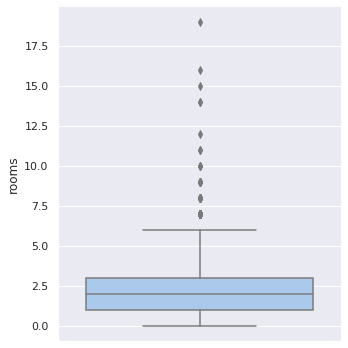

Гистограмма для столбца rooms


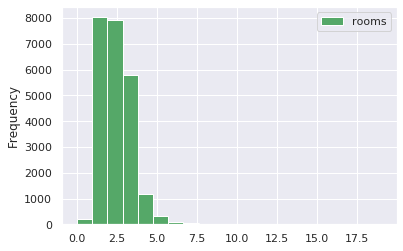

Корреляция значений столбца  rooms  от столбца "last_price" =  0.363321814147036


In [82]:
test_automatization(real_estate, 'rooms')

И таким образом мы сразу можем выводить все требуемые данные за один заход!

Спасибо, что указали на возможность сокращения размера кода!!!

---

#### Исследование площади


Больше всего объявлений о квартирах с площадью до 50 кв метров. Но есть и сильно отбивающиеся значения в 800+. Применим к данным фильтр значений от 0 до 200 кв метров.

In [83]:
len(real_estate.query('total_area > 300'))

61

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff561bed950>]],
      dtype=object)

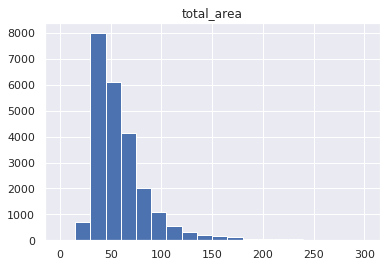

In [84]:
real_estate.hist('total_area', bins=20, range=(0, 300))

Больше всего в продаже квартир площадью 35-50 кв.м. Достаточно много квартир до 60 кв.м. Далее - чем больше площадь, тем меньше квартир в продаже.  
В целом - картина похожа на правду.

---

#### Исследование цены  

Посмотрим минимальные значения в столбце

In [85]:
real_estate['last_price'].sort_values()

8792         12190
17453       430000
14908       430000
16271       440000
17672       450000
           ...    
15648    300000000
1436     330000000
14703    401300000
19536    420000000
12969    763000000
Name: last_price, Length: 23689, dtype: int64

Построим диаграмму по столбцу last_price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff561bc8d10>]],
      dtype=object)

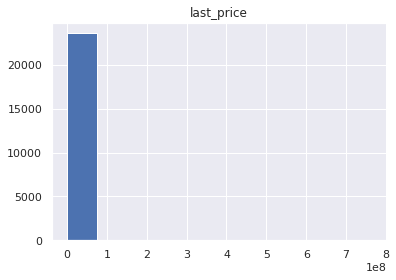

In [86]:
real_estate.hist('last_price')

Информативно.  

Значения столбцов - 10ки миллионов.  

Перепишем гистограмму со значениями в 100 корзин и промежутком от 1 до 8 миллионов и более крупным размером

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5610fa790>]],
      dtype=object)

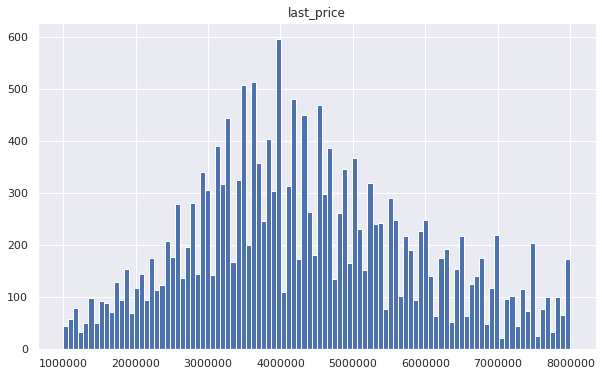

In [87]:
real_estate.hist('last_price', bins=100, range=(1000000, 8000000), figsize=(10, 6))

Теперь лучше.  

Похоже на нормальное распределение. Больше всего обьявлений о квартирах в диапазоне 3-5 млн.руб, пик на 3,9 млн. Что в целом похоже на правдивый рынок по Петербургу.

Интересная закономерность - люди любят выставлять "квантильные" значения в цене: можно проследить пиковые значения на каждом милионном значении, например: 5 млн; 5,25 млн; 5,5 мл; 5,75 млн; 6 млн.

Посмотрим на хвост диаграммы и подумаем, какие значния в дальнейшем можно будет исключить

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff562153990>]],
      dtype=object)

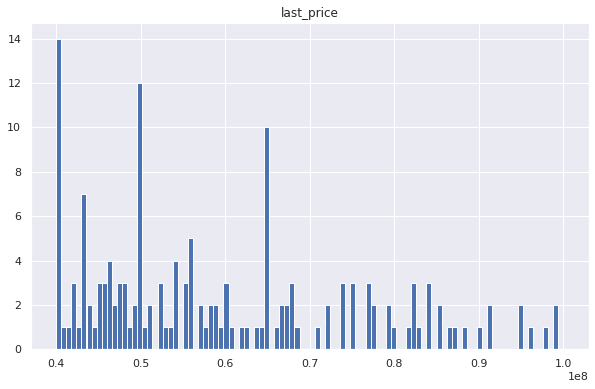

In [88]:
real_estate.hist('last_price', bins=100, range=(40000000, 100000000), figsize=(10, 6))

В дальнейшем отбросим значения более 80 млн руб.

---

#### Количество комнат

Вышеуказанная гистограмма количества комнат указала на следующие особенности:

Длинный хвост, поскольку были квартиры с огромным количеством комнат. Рассмотрим диапазон от студий до 7ми комнатных предложений.

In [89]:
len(real_estate.query('rooms > 7'))

31

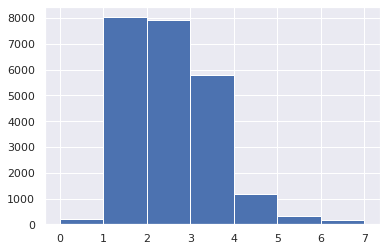

In [90]:
real_estate['rooms'].hist(bins=7, range=(0, 7))

Больше всего "однушек" и "двушек", трехкомнатных тоже в достаточном количестве. Вот интересно, почему так малой студий, ведь строительство и предложения на рынке сейчас в очень большом количестве присутствуют.

---

#### Высота потолков

Так как выше был произведен выброс мусора из данного столбца, мы уже получили нормальное распреденение - больше всего предложений с потолком 2,7-2,8 м, что отражает похожее на правду положение дел на рынке.

---

#### Время продажи квартиры

Построим гистрограмму значений столлбца days_exposition, введем 50 корзин, для большей детализации картины.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff56159cb10>]],
      dtype=object)

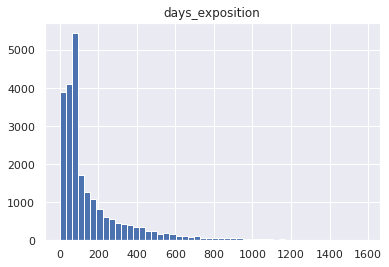

In [91]:
real_estate.hist('days_exposition', bins=50)

Из гистрограммы видно, что пик продаж приходится на значения до 100 дней.  
Странно, что некоторые квартиры продавались почти сразу же - значения начинаются от нуля.  
Рассмотрим ближе диапазон 0-200 дней

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff561bed3d0>]],
      dtype=object)

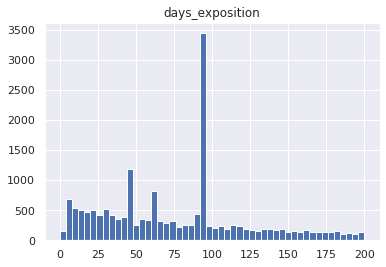

In [92]:
real_estate.hist('days_exposition', bins=50, range=(0,200))

Почти 1500 квартир были проданы в первые дни! В основной же массе - больше всего квартир продано в период 85-95 дней

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5614da350>]],
      dtype=object)

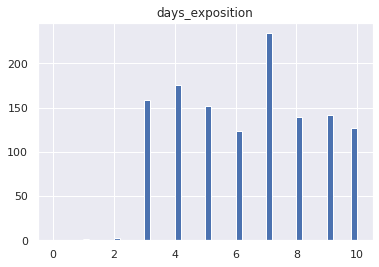

In [93]:
real_estate.hist('days_exposition', bins=50, range=(0,10))

В течение первых двух дней практически не бывает продаж.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5614daad0>]],
      dtype=object)

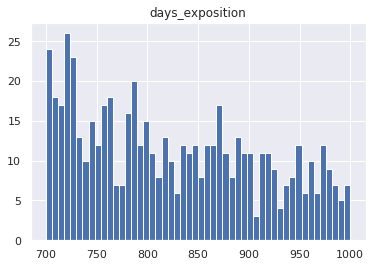

In [94]:
real_estate.hist('days_exposition', bins=50, range=(700,1000))

Свыше 800 дней - квартиры продаются очень плохо

Рассчитаем медиану и среднее значение для столбца времени продажи

In [95]:
real_estate['days_exposition'].median(), real_estate['days_exposition'].mean()

(95.0, 169.3908143019967)

Медиана в 95 дней подтверждает полученные с вышепредставленной диаграммы данные - половина квартир продается до 95 дней.

По итогу - среднее время продажи квартиры - 3 месяца.  
Очень быстрые сделки - до 2х дней.  
Очень долгие - больше 800 дней, поскольку менее 10 квартир продаются в это время

---

#### Убираем выбивающиеся значения

Первым шагом на данном этапе импортирум требуемую библиотеку

In [96]:
import matplotlib.pyplot as plt

Начнем с цены квартиры.  
Построим диаграмму размаха для столбца last_plrice.  
Примерним пределы в -1 млн и 20 млн руб

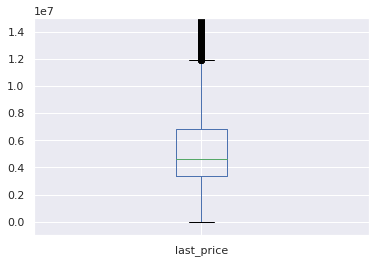

In [97]:
plt.ylim(-1000000,15000000)
real_estate.boxplot('last_price')


Медиана, как и планировалось - лежит на отметке примерно в 4,5 млн руб.

Как видно из данного графика, выбросы начинаются после 12 млн руб. Посмотрим, сколько всего таких значений есть в первичном датасете.

In [98]:
len(real_estate.query('last_price > 12000000'))

1942

Получили практически 10% данных.  
Предлагаю лучше рассмотреть выбросы и понять, какие же значения лучше выделить для менее радикального изменения общих данных.

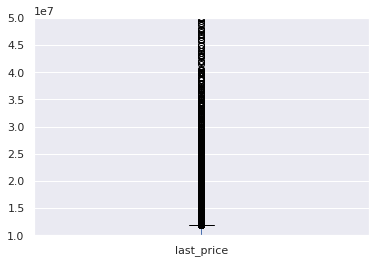

In [99]:
plt.ylim(10000000,50000000)
real_estate.boxplot('last_price')

Плотность выбросов сильно редеет после отметки в 40 млн руб. Проверим, сколько таких значений присутствует в датасете.

In [100]:
len(real_estate.query('last_price > 40000000'))

182

Вот 182 значения уже можно практически безопасно откинуть и не потерять в анализе.

In [101]:
real_estate_filt = real_estate.query('last_price <= 40000000')
len(real_estate_filt)

23507

Переходим ко времени обьявления на сайте

---

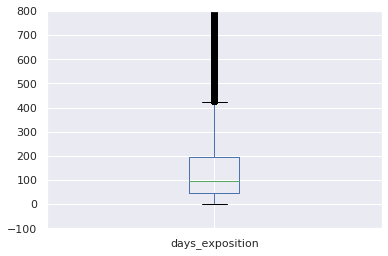

In [102]:
plt.ylim(-100, 800)
real_estate_filt.boxplot('days_exposition')

In [103]:
len(real_estate.query('days_exposition > 400'))

2637

Снова выбросов больше 10% исходных данных. Посмотрим на хвост в более крупном масштабе.

Интересная особенности - большинство квартир продаются в диапазоне до 200 дней. Получается, в среднем, продать квартиру можно менее, чем за 7 месяцев.

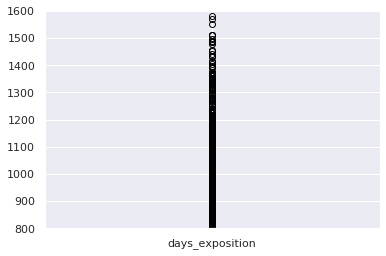

In [104]:
plt.ylim(800, 1600)
real_estate_filt.boxplot('days_exposition')

Толщина выбросов сильно "худеет" после отметки в 1400 дней. Отбросим из обновленной таблицы эти значения.

In [105]:
real_estate_filt = real_estate_filt.query('days_exposition < 1400')
len(real_estate_filt)

23488

---

Проверим количество комнат

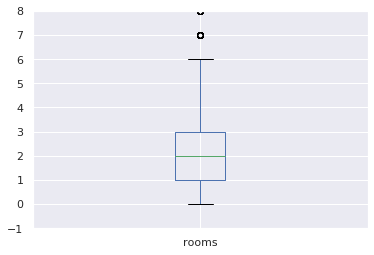

In [106]:
plt.ylim(-1,8)
real_estate_filt.boxplot('rooms')

Ограничимся шестью (6) комнатами.

In [107]:
real_estate_filt = real_estate_filt.query('rooms <= 6')
len(real_estate_filt)

23421

---

И, в завершение, исследуем площадь.

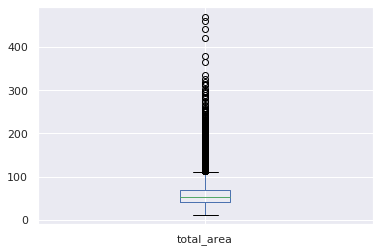

In [108]:
real_estate_filt.boxplot('total_area')

In [109]:
len(real_estate_filt.query('total_area > 110'))

1128

График показывает, что выбросы - это все, что имеет площадь более 110 кв.м. Однако, такие обьекты недвижимости - это практически 5% всего обьема данных.

Рассмотрев выбивающиеся значения - принимае за выбросы площадь более 180 кв.м.

In [110]:
len(real_estate_filt.query('total_area > 180'))

149

In [111]:
real_estate_filt = real_estate_filt.query('total_area <= 180')
real_estate_filt = real_estate_filt.reset_index(drop=True)
len(real_estate_filt)

23272

Была произведена очистка таблицы от выбивающихся значений.
Удалено примерно 2% из исходных данных.  

Данные приведены в новый вид, двигаемся дальше.

---

#### Корреляции

Рассмотрим зависимость цены от квадратного метра

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


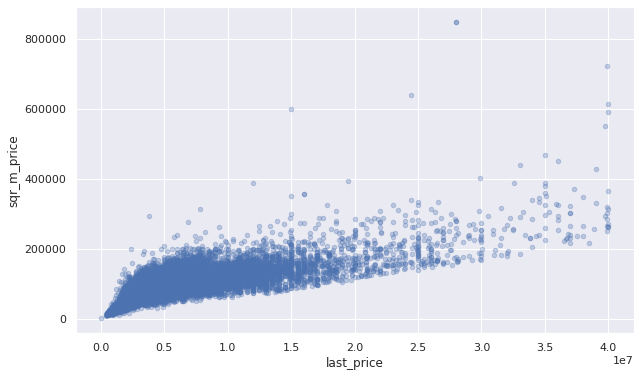

In [112]:
real_estate_filt.plot(x='last_price', y='sqr_m_price', kind='scatter', alpha=0.3, figsize=(10,6));

In [113]:
real_estate_filt['last_price'].corr(real_estate_filt['sqr_m_price'])

0.7152590463777904

Здесь видна очень высокая зависимость цены квартиры от стоимости квадратного метра.

---

Зависимость цены от количества комнат

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(0.4647899704579479, <matplotlib.axes._subplots.AxesSubplot at 0x7ff55f091ed0>)

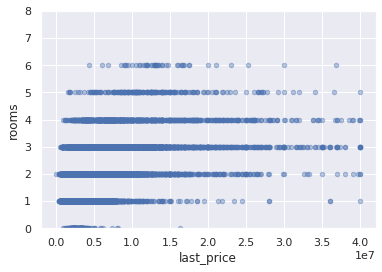

In [114]:
(real_estate_filt['last_price'].corr(real_estate_filt['rooms']), 
real_estate_filt.plot(x='last_price', y='rooms', kind='scatter',alpha=0.4, figsize=(6,4), ylim=(0,8))
);

Как видно, не всегда увеличение количества комнат приводит к увеличению цены. Длинные "жирные" линии в левой половине графика демонстрируют, что за примерно одинаковую цену можно найти 1-2-3 комнатную квартиру. Ведь цена зависит больше от метража и расположения.

---

Зависимость от удаленности от центра

In [115]:
real_estate_filt['last_price'].corr(real_estate_filt['city_center_nearest'])

-0.34048437482038457

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


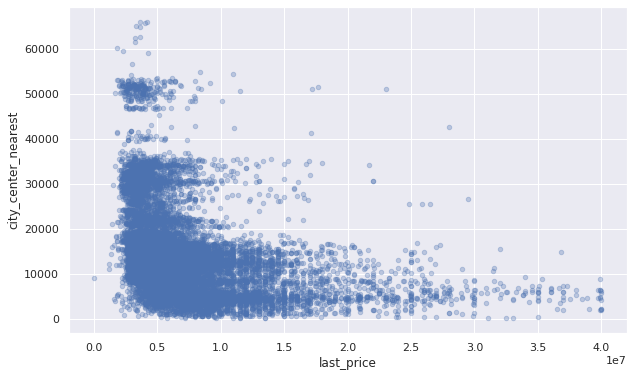

In [116]:
real_estate_filt.plot(x='last_price', y='city_center_nearest', kind='scatter',alpha=0.3, figsize=(10,6));

Видна отрицательная корреляция, ведь, чем дальше от центра (увеличение расстояния), тем меньше цена. Но при этом, корреляция не слишком высока. Как видно на графике - дешевые квартиры можно встретить и в центре и на окраине города.

Однако, проверим гипотезу только в Петербурге. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


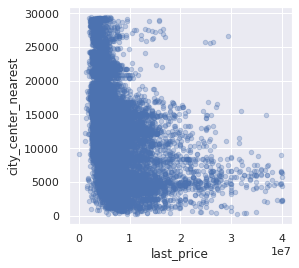

In [117]:
real_estate_filt_sp = real_estate_filt.query('loc_name_filt == "Санкт-Петербург"')
real_estate_filt_sp.plot(x='last_price', y='city_center_nearest', kind='scatter',alpha=0.3, figsize=(4,4));

In [118]:
real_estate_filt_sp['last_price'].corr(real_estate_filt_sp['city_center_nearest'])

-0.39751958605994314

В Санкт-Петербурге данная корреляция чуть выше.

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff55ef3d0d0>,
      dtype=object)

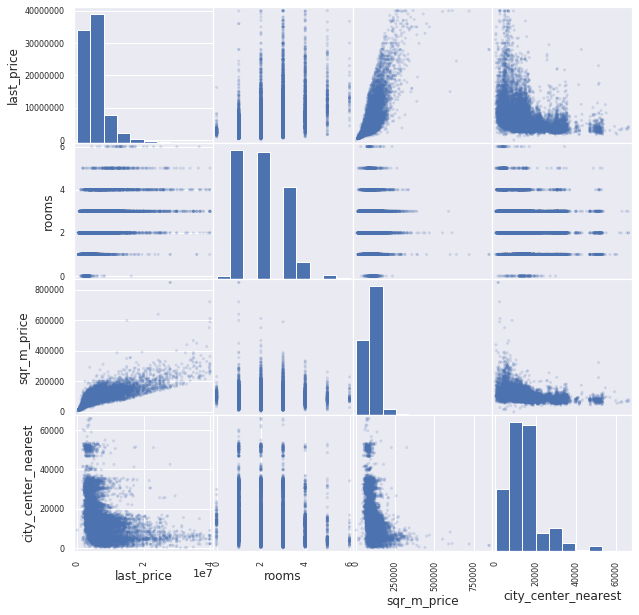

In [119]:
(pd.plotting.scatter_matrix
 (real_estate_filt[['last_price','rooms','sqr_m_price','city_center_nearest']],
  alpha=0.2, figsize=(10,10))
);

<font color=blue> Этот метод также можно отнести к способам автоматизации процесса построения графиков.
    
---


Изучим зависимость цены от этажа.

In [120]:
(real_estate_filt.
 pivot_table(index='floor_name', values='last_price', 
             aggfunc=['median', 'count'])
)

,median,count
,last_price,last_price
floor_name,,
другой,4800000,17158
первый,3900000,2862
последний,4200000,3252


Как видно, на первом этаже квартиры всегда самые дешевые и обьявлений меньше всего (учитываем то, что в сейчас в новостройках первые этажи практически всегда отданы под коммерцию.  
На последних этажах медианные значения цен выше.  
Самые дорогие квартиры - на других этажах.

Посмотрим на зависимость от даты размещения.

In [121]:
(real_estate_filt.
 pivot_table(index='weekday_exp', values='last_price', 
             aggfunc=['median', 'mean', 'count'])
)

,median,mean,count
,last_price,last_price,last_price
weekday_exp,,,
0,4600000,5.759756e+06,3548
1,4700000,5.727709e+06,4112
2,4650000,5.819989e+06,3900
3,4600000,5.875089e+06,4195
4,4530000,5.664672e+06,3941
5,4500000,5.571817e+06,1903
6,4500000,5.618454e+06,1673


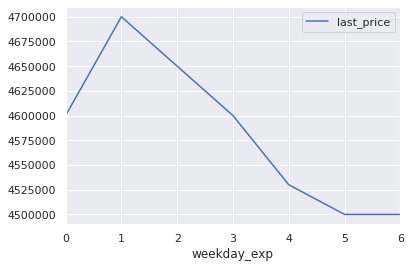

In [122]:
(real_estate_filt.
 pivot_table(index='weekday_exp', values='last_price', 
             aggfunc='median')
 .plot()
);

День недели практически не влияет на цену квартиры.  
Однако, в субботу и воскресенье размещают гораздо практически в 2,5 раза меньше обьявлений, и цены на квартиры в эти дни чуть ниже будничных.

---

Посмотрим на месяц размещения.

In [123]:
(real_estate_filt.
 pivot_table(index='month_exp', values='last_price', 
             aggfunc=['median', 'mean', 'count'])
)

,median,mean,count
,last_price,last_price,last_price
month_exp,,,
1,4599500,5.820242e+06,1468
2,4600000,5.757622e+06,2589
3,4600000,5.673471e+06,2548
4,4750000,5.744892e+06,2338
5,4500000,5.772843e+06,1251
6,4390000,5.582384e+06,1731
7,4600000,5.696105e+06,1653
8,4550000,5.815112e+06,1721


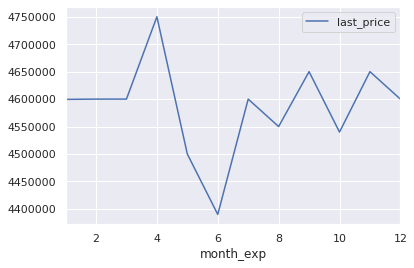

In [124]:
(real_estate_filt.
 pivot_table(index='month_exp', values='last_price', 
             aggfunc='median').
 plot(grid=True)
)

В апреле квартиры стоят дороже всего, в июне - самые дешевые (разница по медианным значениям в 300000 руб).

---

В завершение - зависимость цены от года размещения.

In [125]:
real_estate_filt.pivot_table(index='year_exp', values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
year_exp,,,
2014,7265000,9.369657e+06,119
2015,5200000,6.621420e+06,1135
2016,4490000,5.758194e+06,2724
2017,4490000,5.650450e+06,8038
2018,4510000,5.548328e+06,8421
2019,5000000,6.068010e+06,2835


Отбросим 2014 год (всего 127 обьявлений в датасете) и построим график изменения средней цены.

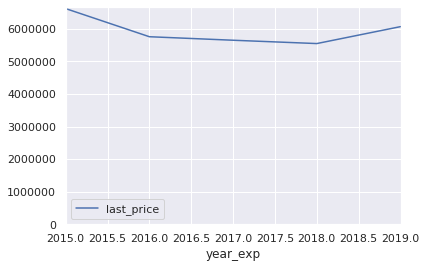

In [126]:
(real_estate_filt.
 query('year_exp > 2014').
 pivot_table(index='year_exp', values='last_price',
            aggfunc = 'mean').
 plot(grid=True, ylim=(0))
)

Вероятно, кризис 16 года сказался и на рынке недвижимости.  
Если смотреть по медианным значениям - то 3 года была стагнация рынка - медианные цены держались на одном уровне.  
В 19 году уже заметен рост цен

---

Отберем 10 населенных пунктов с самым большим числом обьявлений.

In [127]:
real_estate_top_10 = (
    real_estate_filt.
    pivot_table(index='loc_name_filt', values='last_price', aggfunc='count')
)
    
real_estate_top_10.columns=['count']
real_estate_top_10 = real_estate_top_10.sort_values(by='count', ascending=False).head(10)

real_estate_top_10

,count
loc_name_filt,
Санкт-Петербург,16401
Мурино,588
Кудрово,472
Всеволожск,397
Колпино,337
Гатчина,307
Выборг,235
Петергоф,200
Сестрорецк,181


Посчитаем среднюю цену квадратного метра.
Отберем из таблицы real_estate_filt города, входящие в список real_estate_top_10, сгруппируем по столбцу со значениями стоимости квадратного метра, рассчитаем медианные значения.

In [128]:
real_estate_top_10_sqr_m = (
    
    real_estate_filt.
    query('loc_name_filt.isin(@real_estate_top_10.index)').
    pivot_table(index='loc_name_filt', values='sqr_m_price', aggfunc='median')
    
)

real_estate_top_10_sqr_m.sort_values(by='sqr_m_price', ascending=False)

,sqr_m_price
loc_name_filt,
Санкт-Петербург,103076.0
Сестрорецк,99759.0
Пушкин,98601.0
Кудрово,95675.0
Мурино,86249.5
Петергоф,82182.0
Колпино,74722.0
Гатчина,67796.0
Всеволожск,65789.0


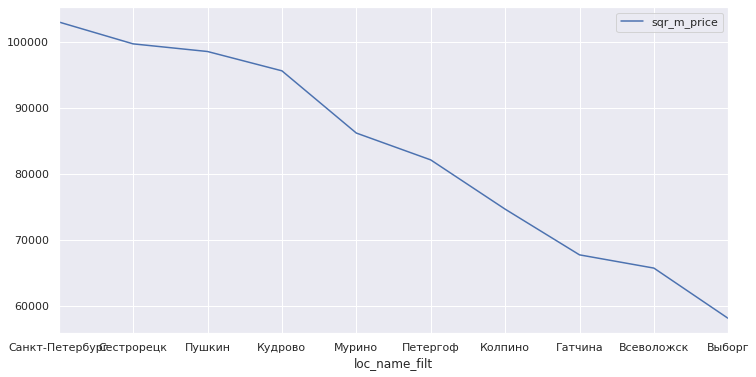

In [129]:
real_estate_top_10_sqr_m.sort_values(by='sqr_m_price', ascending=False).plot(figsize=(12,6));

Самый дорогой метр, как, наверное, ожидалось - в Санкт-Петербурге. Самый дешевый - в Выборге.  
А Выборг то - красивый город, и Финляндия под боком: надо брать =)

---

Выделим самый дорогой и самый "доступный" населенный пункт.

In [130]:
real_estate_price = (
    
    real_estate_filt.
    pivot_table(index='loc_name_filt', values='sqr_m_price', aggfunc='median')
    
)

real_estate_price.sort_values(by='sqr_m_price', ascending=False)

,sqr_m_price
loc_name_filt,
Зеленогорск,103333.0
Санкт-Петербург,103076.0
Сестрорецк,99759.0
Пушкин,98601.0
Кудрово,95675.0
...,...
Совхозный,12628.5
Выскатка,12335.0
"Вахнова', 'Кара",11688.0


Самый дорогой метр, внезапно - в Зеленогорске, самый дешевый в Старополье.  
В целом - похоже на правду, Зеленогорк - курорт на побережье Финского залива, там, в основном, элитная недвижимость.  
Посмотрим по ценам из таблицы.

In [131]:
real_estate_filt.query('loc_name_filt == "Зеленогорск"').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,loc_name_filt,sqr_m_price,weekday_exp,month_exp,year_exp,floor_name,liv_tot_ratio,kitch_tot_ratio
4358,6,2300000,31.0,2016-05-26,1,2.55,3.0,12.0,1,NaN,False,False,9.0,0,Зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0,Зеленогорск,74193,3,5,2016,первый,0.387097,0.290323
22441,16,2950000,31.0,2018-03-07,1,2.70,1.0,16.4,1,NaN,False,False,5.6,0,Зеленогорск,73115.0,54214.0,3.0,188.0,1.0,269.0,328.0,Зеленогорск,95161,2,3,2018,последний,0.529032,0.180645
916,17,3015000,31.2,2019-04-16,1,2.50,3.0,17.5,1,NaN,False,False,5.8,0,Зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,95.0,Зеленогорск,96634,1,4,2019,первый,0.560897,0.185897
19836,6,3100000,30.0,2017-11-23,1,2.55,9.0,12.0,1,NaN,False,False,7.5,0,Зеленогорск,72280.0,53379.0,3.0,147.0,1.0,101.0,95.0,Зеленогорск,103333,3,11,2017,первый,0.400000,0.250000
2913,13,3200000,46.3,2018-03-31,2,2.50,3.0,29.2,2,NaN,False,False,7.0,1,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0,Зеленогорск,69114,5,3,2018,другой,0.630670,0.151188
299,6,3500000,31.0,2016-04-05,1,2.55,5.0,17.5,1,NaN,False,False,5.4,0,Зеленогорск,72005.0,53104.0,3.0,92.0,1.0,571.0,168.0,Зеленогорск,112903,1,4,2016,первый,0.564516,0.174194
18546,15,3600000,57.6,2019-02-08,3,2.55,3.0,41.3,2,NaN,False,False,6.5,1,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0,Зеленогорск,62500,4,2,2019,другой,0.717014,0.112847
17363,8,3700000,40.8,2018-10-10,2,2.50,3.0,27.2,2,NaN,False,False,5.0,1,Зеленогорск,72284.0,53383.0,3.0,305.0,1.0,55.0,27.0,Зеленогорск,90686,2,10,2018,другой,0.666667,0.122549
10339,9,3850000,41.4,2018-09-06,2,2.50,3.0,28.0,1,NaN,False,False,5.1,0,Зеленогорск,72033.0,53132.0,3.0,37.0,1.0,591.0,207.0,Зеленогорск,92995,3,9,2018,первый,0.676329,0.123188
3860,10,4250000,38.0,2017-11-30,1,2.70,3.0,20.0,3,NaN,False,False,8.0,0,Зеленогорск,72078.0,53177.0,3.0,533.0,2.0,123.0,179.0,Зеленогорск,111842,3,11,2017,последний,0.526316,0.210526


Да, цены похожи на Петербургские.  
К которому и переходим.

___

#### Санкт-Петербург

Выделим строки таблицы, в которую входят значения по Санкт-Петербургу.
Оставим только столбцы, необходимые для дальнейшего исследования.  
Получившейся таблице присвоим название saint_p.

In [132]:
saint_p = (
    
    real_estate_filt
    [['loc_name_filt', 'last_price','total_area', 'city_center_nearest', 'rooms', 
      'ceiling_height', 'floor_name', 'weekday_exp', 'month_exp', 'year_exp']].
    query('loc_name_filt == "Санкт-Петербург" and total_area > 20').reset_index(drop=True)
)

saint_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16377 entries, 0 to 16376
Data columns (total 10 columns):
loc_name_filt          16377 non-null object
last_price             16377 non-null int64
total_area             16377 non-null float64
city_center_nearest    16320 non-null float64
rooms                  16377 non-null int64
ceiling_height         16377 non-null float64
floor_name             16377 non-null object
weekday_exp            16377 non-null int64
month_exp              16377 non-null int64
year_exp               16377 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.2+ MB


Необходимо заполнить пропущенные значения до центра города средними значениями

In [133]:
saint_p_center_median = saint_p['city_center_nearest'].median()
saint_p['city_center_nearest'] = saint_p['city_center_nearest'].fillna(value=saint_p_center_median)
saint_p.head()

,loc_name_filt,last_price,total_area,city_center_nearest,rooms,ceiling_height,floor_name,weekday_exp,month_exp,year_exp
0,Санкт-Петербург,13000000,108.0,16028.0,3,2.70,другой,3,3,2019
1,Санкт-Петербург,3350000,40.4,18603.0,1,2.70,первый,1,12,2018
2,Санкт-Петербург,5196000,56.0,13933.0,2,2.70,другой,3,8,2015
3,Санкт-Петербург,10000000,100.0,8098.0,2,3.03,другой,1,6,2018
4,Санкт-Петербург,3700000,37.3,19143.0,1,2.70,другой,3,11,2017


Добавим столбец рассмотяния до центра в км, округлим до ближайшего значения и переведем в целые значения.

In [134]:
saint_p['center_km'] = round(saint_p['city_center_nearest']/1000)
saint_p['center_km'] = saint_p['center_km'].astype('int')
saint_p.head()

,loc_name_filt,last_price,total_area,city_center_nearest,rooms,ceiling_height,floor_name,weekday_exp,month_exp,year_exp,center_km
0,Санкт-Петербург,13000000,108.0,16028.0,3,2.70,другой,3,3,2019,16
1,Санкт-Петербург,3350000,40.4,18603.0,1,2.70,первый,1,12,2018,19
2,Санкт-Петербург,5196000,56.0,13933.0,2,2.70,другой,3,8,2015,14
3,Санкт-Петербург,10000000,100.0,8098.0,2,3.03,другой,1,6,2018,8
4,Санкт-Петербург,3700000,37.3,19143.0,1,2.70,другой,3,11,2017,19


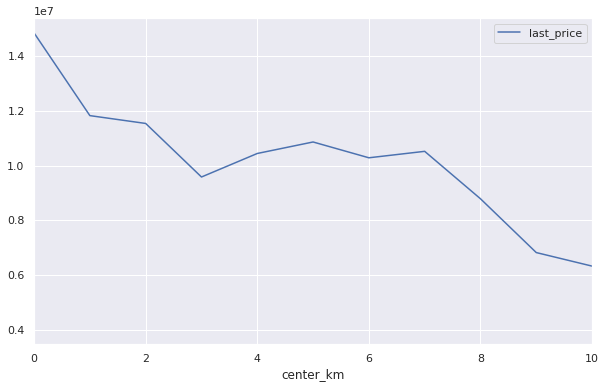

In [135]:
saint_p.pivot_table(index='center_km', values='last_price').plot(grid=True, xlim=(0,10), figsize=(10,6))

In [136]:
saint_p.query('6<center_km<=7').sort_values(by='last_price',ascending=False).head(10)

,loc_name_filt,last_price,total_area,city_center_nearest,rooms,ceiling_height,floor_name,weekday_exp,month_exp,year_exp,center_km
170,Санкт-Петербург,39900000,140.60,6589.0,2,3.5,другой,5,11,2016,7
7901,Санкт-Петербург,39900000,160.00,6516.0,3,3.2,другой,0,2,2017,7
8151,Санкт-Петербург,39773280,136.00,6506.0,4,2.7,другой,4,6,2018,7
2421,Санкт-Петербург,37272000,100.60,7442.0,3,2.7,последний,6,6,2016,7
2135,Санкт-Петербург,37000000,172.00,7302.0,4,3.0,другой,6,11,2017,7
7502,Санкт-Петербург,36700000,162.00,6832.0,4,2.9,другой,2,5,2019,7
864,Санкт-Петербург,36001900,142.30,6941.0,3,3.0,другой,4,8,2017,7
5709,Санкт-Петербург,36000000,123.20,6800.0,1,3.0,другой,6,1,2018,7
11477,Санкт-Петербург,35107000,99.88,7442.0,3,2.7,другой,3,6,2016,7
11600,Санкт-Петербург,35000000,74.80,6655.0,2,3.3,другой,6,4,2018,7


График сильно меняется в двух местах:  
Один "перелом" встречается на 3 км, второй - на 7.  
Остановлюсь на значении в 3 км, поскольку растущие к 7 км значения цены обусловлены большой площадью продаваемый квартир.  Пример представлен в таблице выше.  
Дополнительно карту с расстояниями прилагаю - https://yadi.sk/i/X9G4sNPbDRMlDA  

Итого - центральная часть = радиус в 3 км.

Создадим таблицу saint_p_center с центральной частью Санкт-Петербурга.

In [137]:
saint_p_center = saint_p.query('center_km <= 3').reset_index(drop=True)
saint_p_center

,loc_name_filt,last_price,total_area,city_center_nearest,rooms,ceiling_height,floor_name,weekday_exp,month_exp,year_exp,center_km
0,Санкт-Петербург,6500000,97.2,2336.0,2,2.70,первый,5,10,2015,2
1,Санкт-Петербург,9600000,90.0,2818.0,4,2.70,другой,1,9,2017,3
2,Санкт-Петербург,4800000,40.0,2913.0,2,2.70,другой,5,11,2017,3
3,Санкт-Петербург,8200000,80.0,3167.0,3,4.15,другой,1,11,2018,3
4,Санкт-Петербург,14800000,108.7,2559.0,3,4.00,последний,3,4,2019,3
...,...,...,...,...,...,...,...,...,...,...,...
778,Санкт-Петербург,15300000,97.0,1463.0,3,3.50,другой,2,1,2017,1
779,Санкт-Петербург,5260000,38.0,3441.0,1,3.30,первый,1,11,2018,3
780,Санкт-Петербург,6300000,52.6,3400.0,3,3.25,другой,3,5,2015,3
781,Санкт-Петербург,8700000,73.0,2345.0,3,2.65,последний,2,1,2019,2


---

#### Проанализируем требуемые в задании параметры:  
площадь, цену, высоту потолков и количество комнат.

In [138]:
(saint_p_center.
 pivot_table(index='loc_name_filt', values=['total_area','last_price','ceiling_height','rooms'], 
             aggfunc='median')
)

,ceiling_height,last_price,rooms,total_area
loc_name_filt,,,,
Санкт-Петербург,3.0,9200000,3,80.0


В центре в среднем трехкомнатные квартиры со средней площадью 80 кв.м, и со средней ценой в 9,2 млн руб.  
Копнем глубже:

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff55ce0c4d0>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff55cdecad0>]],
       dtype=object))

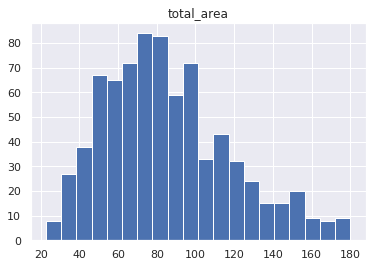

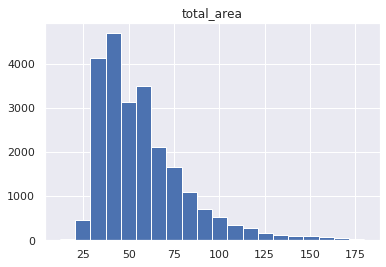

In [139]:
(saint_p_center.hist('total_area', bins=20, figsize=(6,4)),
 real_estate_filt.hist('total_area', bins=20, figsize=(6,4))
)


В центре, в отличие от всего города, большинство квартир с площадью более 70-100 кв. м.

---

Проверим в дейсвии библиотеку seaborn.  
Импортируем и стром красивый зеленый график

In [140]:
import seaborn as sns

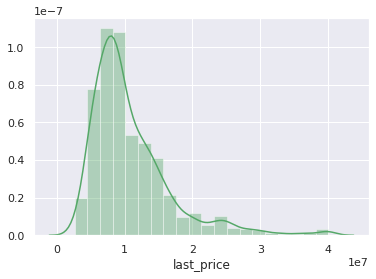

In [141]:
sns.distplot(saint_p_center['last_price'], color="g", bins=20)

В центре дорогие квартиры (как ни странно) - большая часть стоит более 7 млн руб.

А сколько в них обычно комнат?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff55cc42490>]],
      dtype=object)

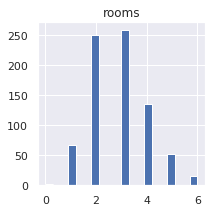

In [142]:
saint_p_center.hist('rooms', bins=20, figsize=(3,3))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


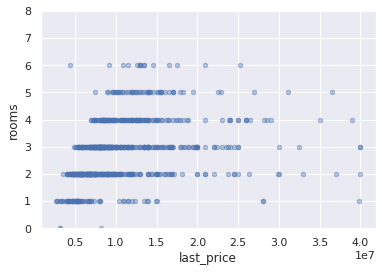

In [143]:
saint_p_center.plot(x='last_price', y='rooms', kind='scatter',alpha=0.4, figsize=(6,4), ylim=(0,8));

Интересно, что в центре города каждая комната прибавляет, в среднем, 1 млн руб к общей стоимости, в отличие от города в целом, где, напомню, корреляция была не такой выраженной.

И в центре, в основном, просторные 2-3х комнатные квартиры

---

In [144]:
saint_p_center['last_price'].corr(saint_p_center['ceiling_height'])

0.17643534974561464

А вот высота потолка практически не влияет на цену.

In [145]:
saint_p_center['last_price'].corr(saint_p_center['total_area'])

0.5718159344937361

В 60% случаев - чем больше площадь квартиры в центре - тем выше её стоимость.

---

In [146]:
(saint_p_center.
 pivot_table(index='floor_name', values='last_price', 
             aggfunc=['median', 'count'])
)

,median,count
,last_price,last_price
floor_name,,
другой,9800000,473
первый,7100000,121
последний,9000000,189


Статистки по этажам в центре похожа на общегородскую - первый этаж самый дешевый и самый вяло продающийся, жители "других" этажей продают и покупают недвижимость чаще всего.

---

In [147]:
(saint_p_center.
 pivot_table(index='weekday_exp', values='last_price', 
             aggfunc=['median', 'mean', 'count'])
)

,median,mean,count
,last_price,last_price,last_price
weekday_exp,,,
0,9527500,1.100281e+07,122
1,8850000,1.030680e+07,114
2,9500000,1.115522e+07,127
3,8985000,1.142670e+07,164
4,9200000,1.066428e+07,155
5,8250000,9.232604e+06,53
6,9450000,1.132912e+07,48


По субботам выставляют самые дешевые квартиры в центре! А в понедельник и среду самая высокая актиность на рынке.

---

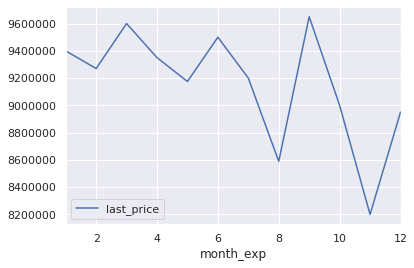

In [148]:
(saint_p_center.
 pivot_table(index='month_exp', values='last_price', 
             aggfunc='median')
).plot()

В августе можно найти самые дешевые квартиры в центре, а в сентябре цены резко взлетают вверх

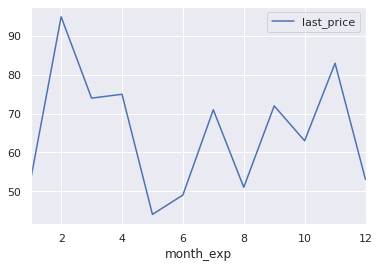

In [149]:
(saint_p_center.
 pivot_table(index='month_exp', values='last_price', 
             aggfunc='count')
).plot()

И при этом - февраль, ноябрь и март - самые активные месяцы по количество выставленных на продажу обьектов, а вот в мае-июне - летнее затишье. Картина похожа на общегородскую.

---

In [150]:
(saint_p_center.
 pivot_table(index='year_exp', values='last_price', 
             aggfunc=['median', 'mean', 'count'])
)

,median,mean,count
,last_price,last_price,last_price
year_exp,,,
2014,16200000,1.590000e+07,3
2015,9990000,1.212768e+07,79
2016,9500000,1.042090e+07,109
2017,8500000,1.014996e+07,282
2018,9375000,1.114713e+07,224
2019,10199000,1.154868e+07,86


По годам похожая картина - кризис 16го года затронул и более состоятельных покупателей. И интересно, что в 17м году было больше предложений по продаже - всем потребовались живые деньги.

---

Завершаем исследование зависимостью удаленностью квартир в центре от Петропавловской крепости или Эрмитажа.

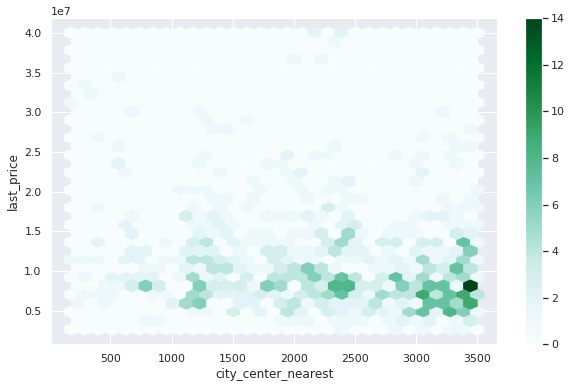

In [151]:
saint_p_center.sort_values(by='last_price').plot(
    x='city_center_nearest', y='last_price', 
    kind='hexbin', sharex=False, figsize=(10,6), gridsize=30);

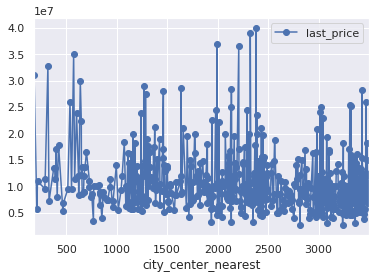

In [152]:
saint_p_center.pivot_table(index='city_center_nearest', values='last_price', aggfunc='median').plot(style='o-');

Как видно - на цену не особо влияет удаленность от центра в историческом центре города. Чем дальше от Заячьего острова - тем больше предложений в целом.

---

### Вывод

Выводы, полученные в ходе анализа, представлены списком, от более важных с менее ценным:

* Средняя цена квартира на рынке города – 4 млн руб.  
*	Средняя площадь квартиры на рынке – 35-50 кв. м.  
*	Средняя высота потолков в городе – 2,7-2,8 метра.
*	В городе в подавляющем большинстве в продаже 1 и 2 комнатные квартиры. В целом по городу – количество комнат влияет на стоимость квартиры примерно в половине объявлений.
*	Первый этаж всегда самый дешевый и пользуется наименьшим спросом. Последние этажи несколько дорожи. Этажи в серединке – самые дорогие и представлены на рынке максимально широко.
*	Очень быстрыми продажами являются сделки до 3х дней, очень долгими – свыше шестисот. При этом большая часть квартир продается примерно за 3 месяца (90-95 дней). 
*	Чем дальше от центра, тем дешевле. Однако, можно встретить дорогие квартиры в новых элитных районах.
*	Больше всего на продажу квартир выставляется зимой и осенью. Летом рынок в стагнации, цены наблюдаются на самом низком уровне.
*	Самый дорогой квадратный метр – в Зеленогорске и Санкт-Петербурге, самый дешевый – в Старополье.
*	Из артефактов были замечены очень просторные квартиры (более 900кв.м обще площади (но такие реально существуют, особенно в центре города. Высоченные потолки (больше 5 м) и странные по размеру квартиры (меньше 12 м) были исключены из исследования.  

В центре Санкт-Петербурга (радиус 3 км) ситуация отличается:
*	Общая площадь вырастает до 80-100 кв.м.
*	Больше всего представлено трехкомнатных квартир
*	Потолки становятся выше – среднее значение в 3 м.
*	Средняя цена вырастает до 9,2 млн руб
*	В понедельник и среду наблюдается максимальная активность на рынке недвижимости, а в выходные выставляют на продажи объекты по самым низким ценам
*	Зависимости цены от расстояния до центра не обнаружено.


### Общий вывод

Исходным дата-сетом настоящего исследования выступали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  

В качестве основной задачи второго проекта выступала отработка навыка установление параметров для нахождения рыночной стоимости обьектов недвижимости.  
Целями являлись вычленение требуемых значений исходной таблицы, поиск зависимостей и построение необходимых графиков для ответов на поставленные проекте вопросы.  

Отработка основых навыков посторения гистограм, графиков и поиска корреляции произведена успешно.

Общим итогом работы стали выводы, представленные в предыдущем шаге.  
Были проанализированны и обработаны следующие приоритетне пункты в объявлениях:
* Средняя цена и площадь
* Этаж, количество комнат
* Удаленность от центра города и аэропорта

Итого, усредненная квартира на продажу выглядит следующим образом:
1 или 2 комнаты, 45 кв.метров, ~4 млн руб, в радиусе до 7 км от центра города, с высотой потолков 2,7 м и кухней в 9 квадратов.

В финальной части задания были выявлены закономерности среди отношения цены к основным критериям объектов недвижимости.
На основании полученных данных и закономерностей, в дальнейшем можно будет построить работающую модель, рассчитывающую рыночную стоимость квартиры и защищающую всех участников рынка от мошеннических операций.

---